In [10]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from skimage import io
import imutils
%matplotlib inline


In [11]:
def remove_shadow(img):
    rgb_planes = cv2.split(img)
    kernel = np.ones((20, 20), np.float32)/400
    result_planes = []
    for plane in rgb_planes:
        f = cv2.filter2D(plane, -1, kernel)
        result_planes.append(f)
    result_planes = np.array(result_planes, np.int32)
    result_planes = (rgb_planes-result_planes)
    result = cv2.merge(result_planes)
    result[result < 0] = 0
    result = result*9
    result = np.array(result, np.uint8)
    return result


In [12]:
def show_img(imgs, size=10):
    if type(imgs) is not list:
        imgs = [imgs]
    fig = plt.figure(figsize=(size, size))
    for i in range(len(imgs)):
        a = fig.add_subplot(1, len(imgs), i+1)
        plt.imshow(imgs[i], cmap='gray')
        plt.axis("off")
    plt.show()


In [13]:
def read_img(path):
    img = io.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imutils.resize(img, width=3000)
    img = img[:int(img.shape[0]*(1-0.1))]
    img = img[:, int(img.shape[1]*0.05):]
    img = img[:, :int(img.shape[1]*(1-0.05))]
    img = img[int(img.shape[0]*0.05):]
    return img


In [14]:
img_m = []
img_f = []


## Read the images

In [15]:
print("Corrupted imgs:")
for dirname, _, filenames in os.walk('./cmp23-handwritten-males-vs-females/Female/'):
    for filename in filenames:
        filepath = dirname+filename
        try:
            img_f.append(read_img(filepath))
        except:
            print(filepath)

for dirname, _, filenames in os.walk('./cmp23-handwritten-males-vs-females/Male/'):
    for filename in filenames:
        filepath = dirname+filename
        try:
            img_m.append(read_img(filepath))
        except:
            print(filepath)


Corrupted imgs:
./cmp23-handwritten-males-vs-females/Female/.DS_Store
./cmp23-handwritten-males-vs-females/Female/F28.jpg
./cmp23-handwritten-males-vs-females/Female/F74.jpg
./cmp23-handwritten-males-vs-females/Male/M152.jpg


In [16]:
print("Male size:", len(img_m))
print("Female size:", len(img_f))


Male size: 125
Female size: 73


## Clip writing area

### Tests

Threasholded Shadow Free:


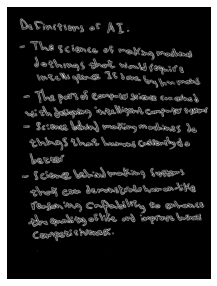

Result:


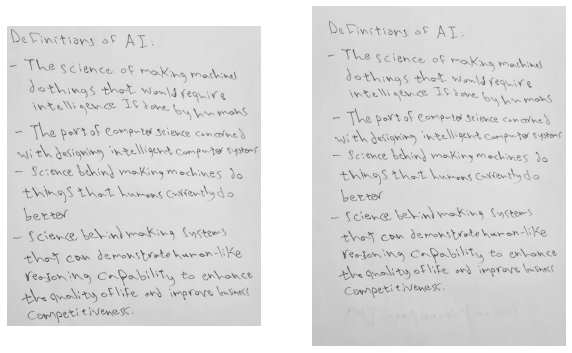

In [17]:
img = img_m[7]

shadow_free_img = remove_shadow(img)
binary = (shadow_free_img > 90).astype(np.uint8)
print("Threasholded Shadow Free:")
show_img(binary,5)

kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(binary, kernel, iterations=2)
dilate = cv2.dilate(erosion, kernel, iterations=30)

coords = cv2.findNonZero(dilate)
x, y, w, h = cv2.boundingRect(coords)
rect = img[y:y+h, x:x+w]
print("Result:")
show_img([rect, img])


### Function

In [18]:
def clip_writing_area(img):
    shadow_free_img = remove_shadow(img)
    binary = (shadow_free_img > 90).astype(np.uint8)
    kernel = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(binary, kernel, iterations=2)
    dilate = cv2.dilate(erosion, kernel, iterations=30)
    coords = cv2.findNonZero(dilate)
    x, y, w, h = cv2.boundingRect(coords)
    rect = img[y:y+h, x:x+w]
    return rect


### Apply the function to all images and recreate the dataset.

In [20]:
img_m_clip = []
img_f_clip = []
for i in range(len(img_m)):
    img = clip_writing_area(img_m[i])
    img_m_clip.append(img)
    cv2.imwrite(f'./CMP23-Dataset/Male/M{i}.jpg', img)

for i in range(len(img_f)):
    img = clip_writing_area(img_f[i])
    img_f_clip.append(img)
    cv2.imwrite(f'./CMP23-Dataset/Female/F{i}.jpg', img)



### Show some samples

In [ ]:
for i in range(5):
    rand_num = np.random.randint(0, len(img_m))
    print("Random", rand_num)
    show_img([img_m[rand_num], img_m_clip[rand_num]])
